In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [32]:
columns = ['category','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape',' stalk-root',' stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [33]:
df=pd.read_csv('mushroom_dataset.csv',names=columns,header=0)

In [34]:
df

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [35]:
df.category.unique()

array(['e', 'p'], dtype=object)

In [36]:
df.category.value_counts()

e    4208
p    3915
Name: category, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1 = df.iloc[:,:]
list1

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [38]:
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [39]:
df

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
category                     8123 non-null int32
cap-shape                    8123 non-null int32
cap-surface                  8123 non-null int32
cap-color                    8123 non-null int32
bruises                      8123 non-null int32
odor                         8123 non-null int32
gill-attachment              8123 non-null int32
gill-spacing                 8123 non-null int32
gill-size                    8123 non-null int32
gill-color                   8123 non-null int32
stalk-shape                  8123 non-null int32
 stalk-root                  8123 non-null int32
 stalk-surface-above-ring    8123 non-null int32
stalk-surface-below-ring     8123 non-null int32
stalk-color-above-ring       8123 non-null int32
stalk-color-below-ring       8123 non-null int32
veil-type                    8123 non-null int32
veil-color                   8123 non-null int32
ring-number

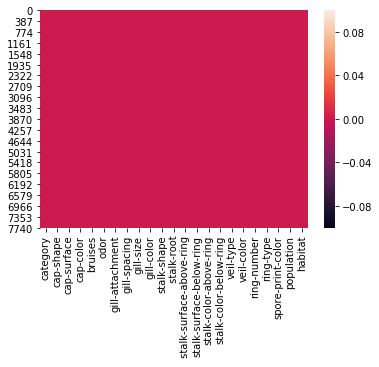

In [42]:
sns.heatmap(df.isnull())

In [45]:
df.describe()

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.0,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.481965,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,4.810784,...,1.603595,5.816201,5.794534,0.0,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,0.499705,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,3.540565,...,0.676001,1.901819,1.907362,0.0,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [46]:
df.drop(['veil-type'],axis=1,inplace=True)

In [47]:
df

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [48]:
dfcor = df.corr()
dfcor

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
category,1.000000,0.052826,0.178440,-0.031361,-0.501758,-0.093675,0.129188,-0.348358,0.539944,-0.530574,...,-0.334712,-0.298901,-0.154096,-0.146824,0.145133,-0.214349,-0.411942,0.172063,0.298776,0.216990
cap-shape,0.052826,1.000000,-0.050475,-0.048181,-0.035530,-0.022050,0.078850,0.013253,0.053872,-0.006010,...,-0.030507,-0.032668,-0.031741,-0.030473,0.072547,-0.106509,-0.025580,-0.073337,0.063484,-0.042492
cap-surface,0.178440,-0.050475,1.000000,-0.019398,0.070214,0.045220,-0.034183,-0.282302,0.208103,-0.161014,...,0.089081,0.107957,0.066041,0.068876,-0.016606,-0.026143,-0.106429,0.230382,0.021564,0.163893
cap-color,-0.031361,-0.048181,-0.019398,1.000000,-0.000736,-0.387119,0.041440,0.144250,-0.169452,0.084654,...,-0.060822,-0.047697,0.002379,0.008073,0.036133,-0.005829,0.162545,-0.293548,-0.144785,0.033983
bruises,-0.501758,-0.035530,0.070214,-0.000736,1.000000,-0.061962,0.137347,-0.299438,-0.369897,0.527200,...,0.460777,0.458947,0.083456,0.092792,0.119759,0.056830,0.692933,-0.284943,0.088221,-0.075417
odor,-0.093675,-0.022050,0.045220,-0.387119,-0.061962,1.000000,-0.059611,0.063987,0.310390,-0.129195,...,0.118552,0.061761,0.174477,0.169350,-0.057765,0.111939,-0.281519,0.469163,-0.043570,-0.026839
gill-attachment,0.129188,0.078850,-0.034183,0.041440,0.137347,-0.059611,1.000000,0.071499,0.108969,-0.128563,...,-0.088933,-0.116191,0.099289,0.097150,0.897518,0.093242,-0.146716,-0.029512,0.165588,-0.030353
gill-spacing,-0.348358,0.013253,-0.282302,0.144250,-0.299438,0.063987,0.071499,1.000000,-0.108268,0.100182,...,-0.212331,-0.213750,0.274618,0.253548,0.073371,0.243004,-0.195859,0.047289,-0.529296,-0.154611
gill-size,0.539944,0.053872,0.208103,-0.169452,-0.369897,0.310390,0.108969,-0.108268,1.000000,-0.516767,...,0.056194,0.010788,0.296482,0.278636,0.103797,-0.171339,-0.461135,0.623217,0.147799,0.161107
gill-color,-0.530574,-0.006010,-0.161014,0.084654,0.527200,-0.129195,-0.128563,0.100182,-0.516767,1.000000,...,0.224313,0.257247,-0.058283,-0.074765,-0.097579,0.096047,0.629462,-0.416167,-0.034105,-0.202967


In [49]:
df

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [50]:
df.shape

(8123, 22)

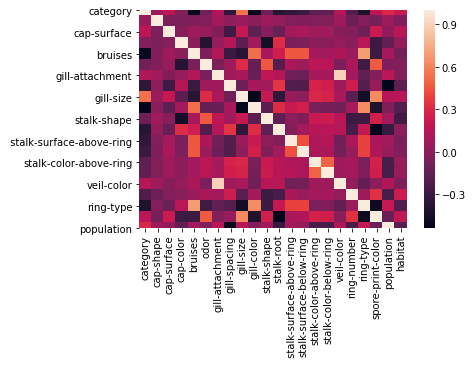

In [51]:
sns.heatmap(dfcor)

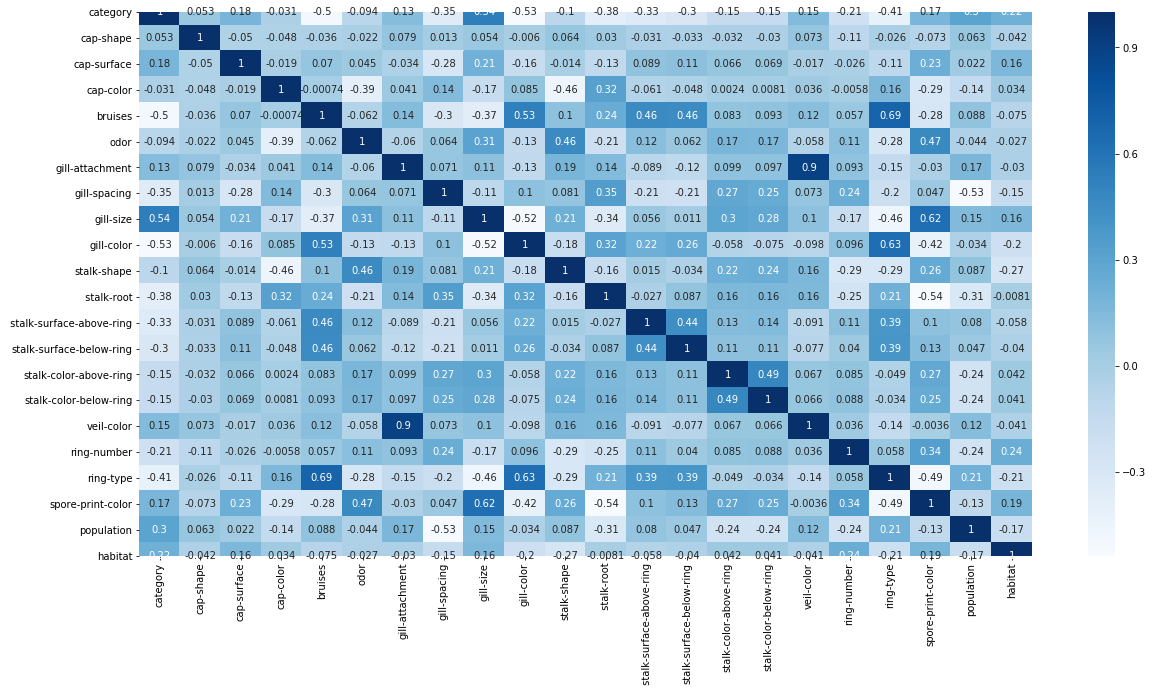

In [52]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

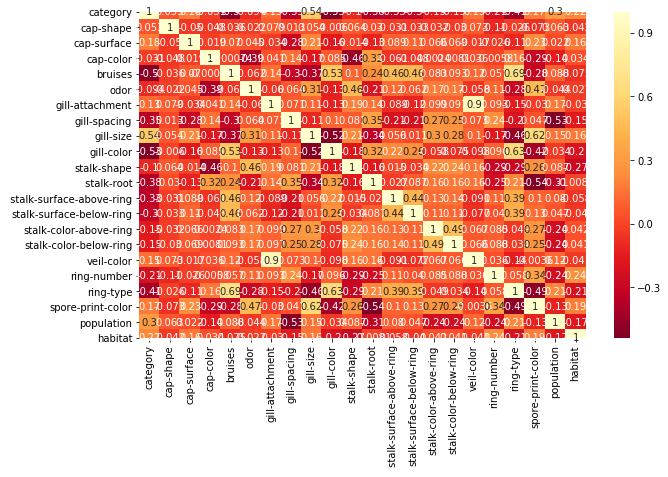

In [53]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [54]:
collist=df.columns.values
ncol=15
nrows=15

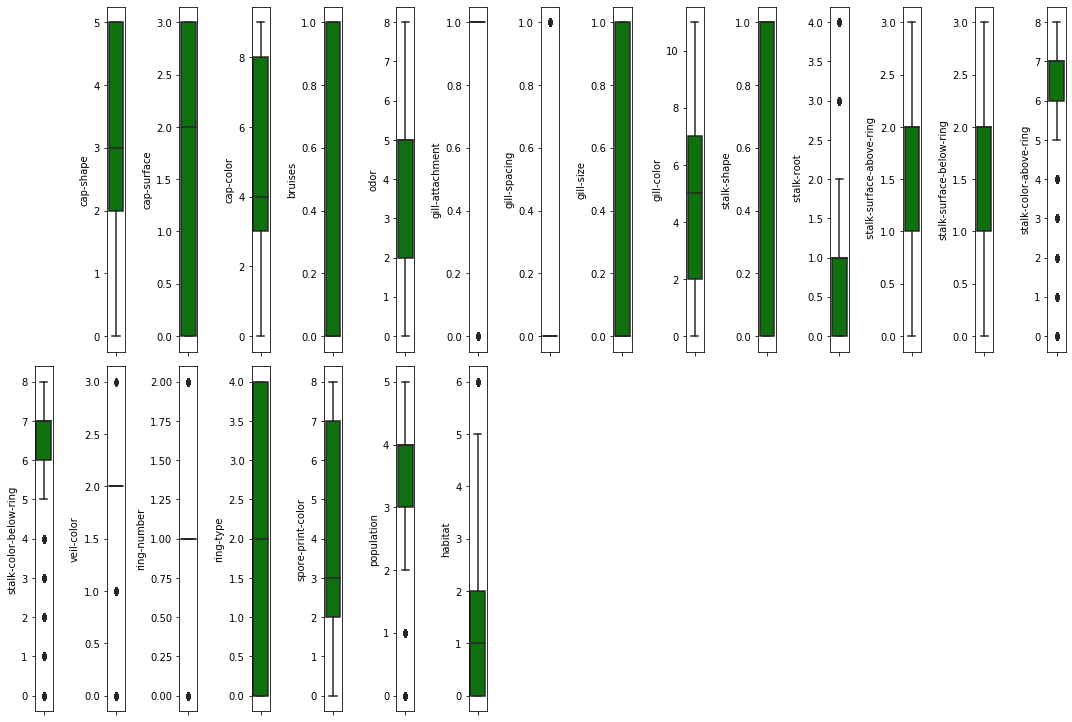

In [55]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

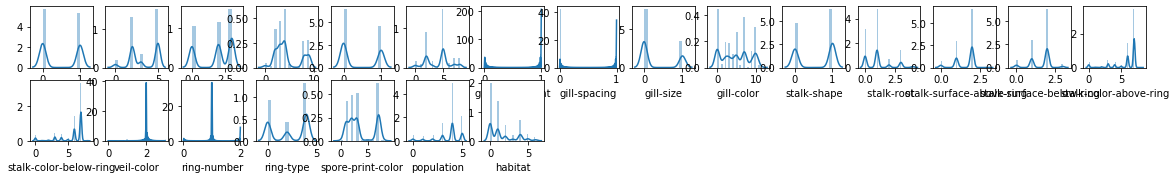

In [64]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

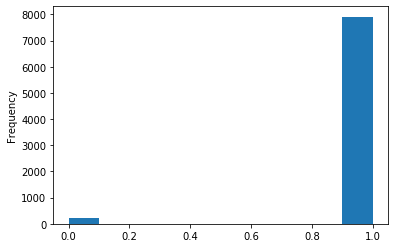

In [57]:
df['gill-attachment'].plot.hist()

In [22]:
from scipy.stats import boxcox

In [58]:
df['gill-attachment']=boxcox(df['gill-attachment'],0)

ValueError: Data must be positive.

In [59]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.96455727, 1.02984283, 0.14013674, ..., 0.25054462, 1.3131121 ,
        0.29553654],
       [0.96455727, 2.08692816, 0.14013674, ..., 0.25054462, 1.3131121 ,
        0.86756584],
       [1.03674508, 1.02984283, 0.95323012, ..., 0.67025464, 0.51442924,
        2.03066822],
       ...,
       [0.96455727, 0.84021976, 0.14013674, ..., 1.50967469, 2.11179496,
        0.28601465],
       [1.03674508, 0.21686556, 0.95323012, ..., 1.42829549, 0.28425362,
        0.28601465],
       [0.96455727, 1.02984283, 0.14013674, ..., 0.16916541, 2.11179496,
        0.28601465]])

In [60]:
threshold = 3
print(np.where(z>3))

(array([1815, 2127, 2127, ..., 8120, 8122, 8122], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [61]:
df_new=df[((z<3).all(axis=1))]

In [62]:
df_new

,category,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,0
8115,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
8116,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0
8117,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0


In [63]:
df.shape

(8123, 22)

In [70]:
x = df_new.iloc[:,1:]

In [71]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,3,3,2,0,8,1,0,1,0,1,...,1,1,6,6,2,1,0,7,4,0
8115,3,3,4,0,7,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,2
8116,3,2,2,0,8,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,0
8117,3,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,0


In [72]:
y =df_new.iloc[:,0]

In [78]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8112    1
8115    1
8116    1
8117    1
8121    1
Name: category, Length: 6567, dtype: int32

In [80]:
y.shape

(6567,)

In [81]:
y = y.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [76]:
x = scale.fit_transform(x)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [83]:
x_train.shape

(4399, 21)

In [84]:
y_train.shape

(4399,)

In [85]:
x_test.shape

(2168, 21)

In [86]:
y_test.shape

(2168,)

In [87]:
lg = LogisticRegression()

In [88]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[0 1 1 ... 1 1 0]
accuracy_score: 0.9552583025830258
[[1092   44]
 [  53  979]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1136
           1       0.96      0.95      0.95      1032

    accuracy                           0.96      2168
   macro avg       0.96      0.95      0.96      2168
weighted avg       0.96      0.96      0.96      2168



In [90]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8782287822878229
[[1081   55]
 [ 209  823]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1136
           1       0.94      0.80      0.86      1032

    accuracy                           0.88      2168
   macro avg       0.89      0.87      0.88      2168
weighted avg       0.89      0.88      0.88      2168



In [91]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 1.0
[[1136    0]
 [   0 1032]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1136
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168



In [92]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.9995387453874539
[[1136    0]
 [   1 1031]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1136
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168



In [93]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 1.0
[[1136    0]
 [   0 1032]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1136
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168

